# CASE STUDY 

##  Steps to  follow:-

a)  Reading,understanding and visualsing the data

b)  Preparing the data for modelling(train-test,rescaling etc)

c)  Training the model

d)  Residual Analysis

e)  Prediction and evaluation on data set


In [766]:
# Importing liabraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as mpl
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [767]:
# Reading the data
car = pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [768]:
#205(Rows & 26 Column)
car.shape

(205, 26)

In [769]:
# datatypes:- float(8),int(8),object(10)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [770]:
# Checking the percentage of missing values(column-wise)
round(100*(car.isnull().sum()/len(car.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

### Here we can see that respective column does not having any missing values so there is no need to drop any column

In [771]:
# Statistical summary
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [772]:
# Splitting car name from company name
CompanyName = car['CarName'].apply(lambda x: x.split()[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [773]:
car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# We can see that are some spelling error so we have to replace it then

## maxda = mazda
## porcshce = porsche
## Nissan = nissan
## toyouta = toyota
## vokswagen = volkswagen
## vw = volkswagen

In [774]:
CompanyName = CompanyName.str.lower()

def replace_name(a,b):
    CompanyName.replace(a,b,inplace = True)
    CompanyName.str.lower()
    
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [775]:
# Checking for duplicates 
car.loc[car.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [776]:
# Checking for columns
car.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [777]:
# Check if the column is cat or conti
for i in car.columns:
    if car[i].dtype == object:
        print(car[i].value_counts())

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
maxda           2
renault         2
Nissan          1
porcshce        1
vokswagen       1
toyouta         1
mercury         1
Name: CompanyName, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12


# Visualising the categorical data
- symboling
- CompanyName
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- fuelsystem

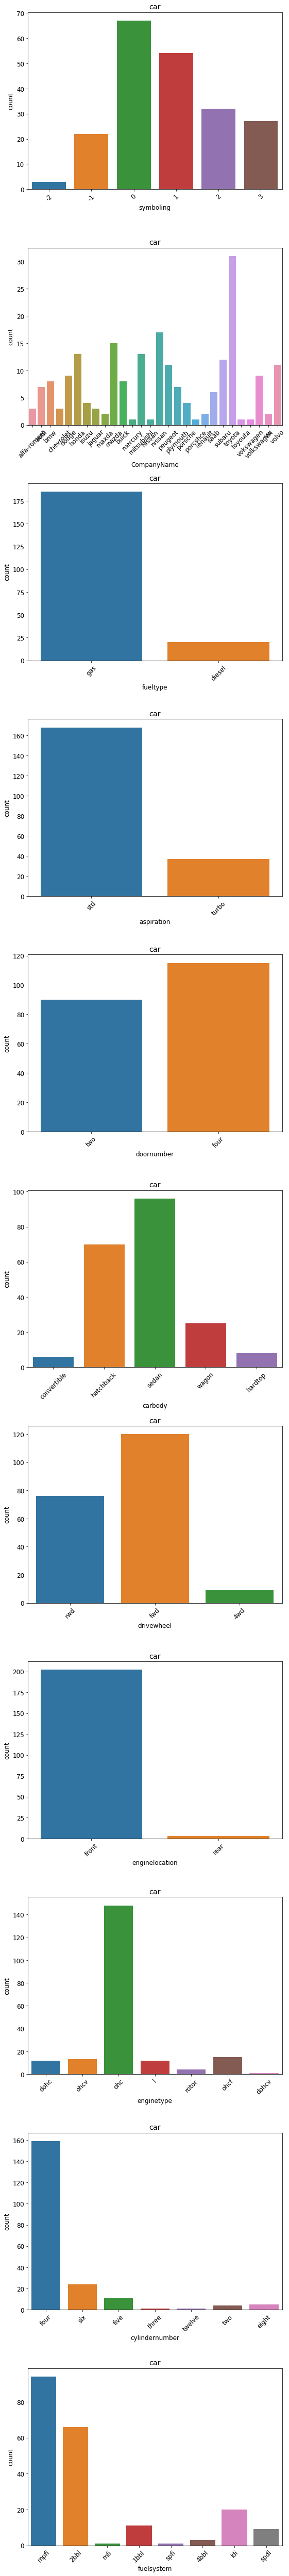

In [778]:
# Univariate Analysis for  category column
mpl.rcParams['font.size'] = 12
features = ['symboling','CompanyName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
plt.figure(figsize =(15,80))
n = 1
for i in enumerate(features):
    ax = plt.subplot(11,2,n).set_title('car'.format(n))
    sns.countplot(x = i[1] , data = car)
    plt.xticks(rotation = 45)
    plt.tight_layout(rect=[0,0.03,1,0.9])
    n = n+2

# From the above Univariate Analysis point of view, Our following observation:
    
- Symboling colums:- '0' and '1' bieng the favoured of having higher number of rows i.e they must be sold
- Company Name:-  sabaru bieng the most favoured company 
- fuel type :- Number of gas fueled vehicle are higher than diesel
- aspiration :- aspiration with std is higher than the aspiration with turbo  
- doornumber :- doornumber with four are slightly more than doornumber with two  
- carbody :- Sedan model is often sold in comparison to the convertible carbody   
- drivewheel : - More than 100% fwd are used as drivewheel while more than 60% in rwd and very less number with 4wd
- enginelocation :- More than 200% enginelocation is in front and very few with rear 
- enginetype :- ohc seems to be the favoured engine type 
- cylindernumber :- cylindernumber four bieng the most favoured among two,three,five,six ,eighth and twelve
- fuelsystem :- More than 80% fuelsystem are mpfi 

<Figure size 1080x5040 with 0 Axes>

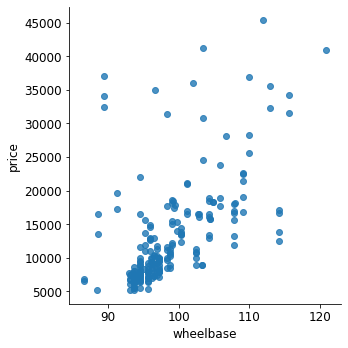

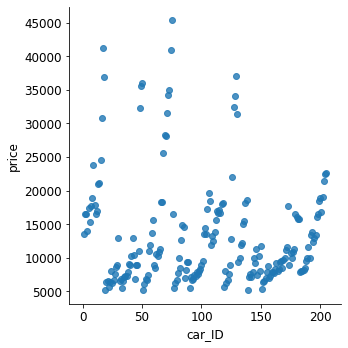

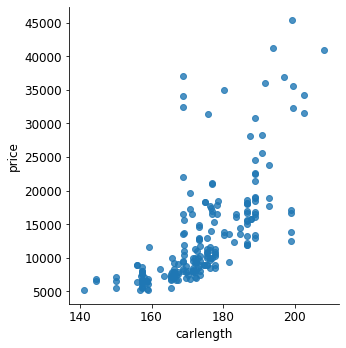

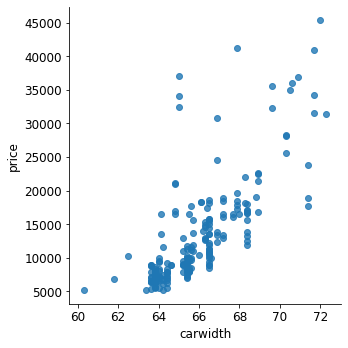

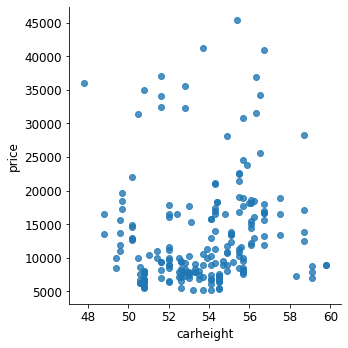

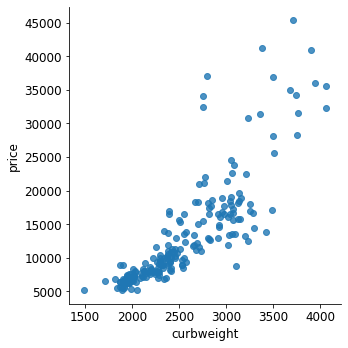

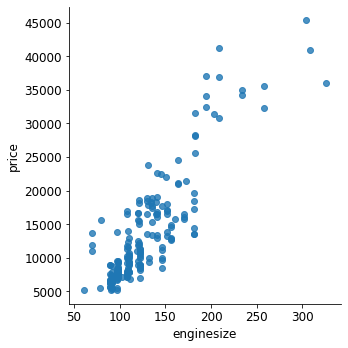

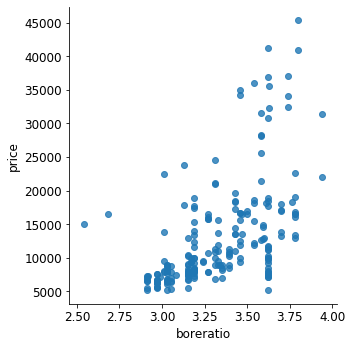

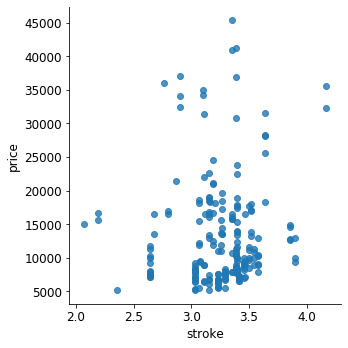

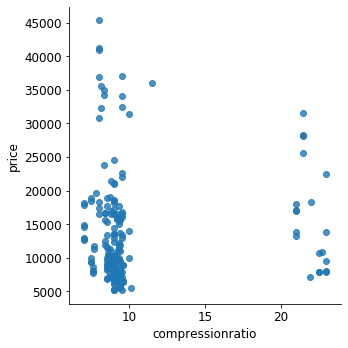

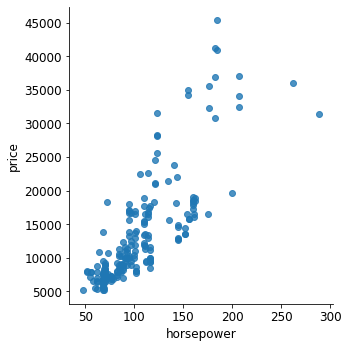

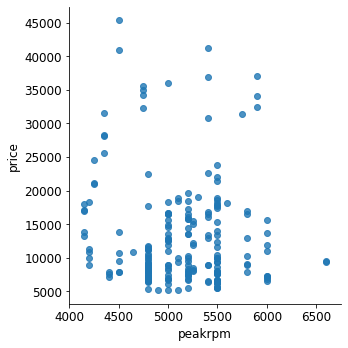

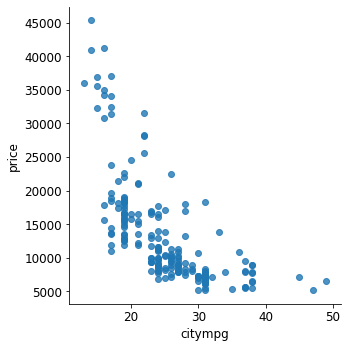

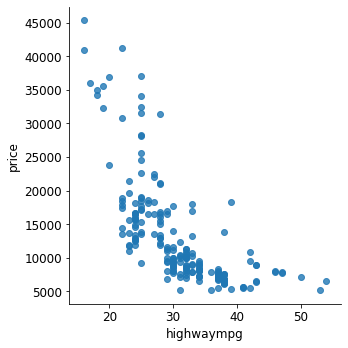

In [779]:
# Bivariate analysis for numerical column
## Scatter Plot
plt.figure(figsize=(15,70))
sns.lmplot('wheelbase','price',data = car,fit_reg = False)
sns.lmplot('car_ID','price',data = car,fit_reg = False)
sns.lmplot('carlength','price',data = car,fit_reg = False)
sns.lmplot('carwidth','price',data = car, fit_reg = False)
sns.lmplot('carheight','price',data = car, fit_reg = False)
sns.lmplot('curbweight','price',data = car, fit_reg = False)
sns.lmplot('enginesize','price',data = car, fit_reg = False)
sns.lmplot('boreratio','price',data = car, fit_reg = False)
sns.lmplot('stroke','price',data = car, fit_reg = False)
sns.lmplot('compressionratio','price',data = car, fit_reg = False)
sns.lmplot('horsepower','price',data = car, fit_reg = False)
sns.lmplot('peakrpm','price',data = car, fit_reg = False)
sns.lmplot('citympg','price',data = car, fit_reg = False)
sns.lmplot('highwaympg','price',data = car, fit_reg = False)
plt.show()

# From the above Bivariate Analysis of having numerical column , Our following observation:

- wheelbase, carlength,carwidth,curbweight seems to have some significant correlation to price
    
- citympg,highwaympg seems to have some  negative correlation to price

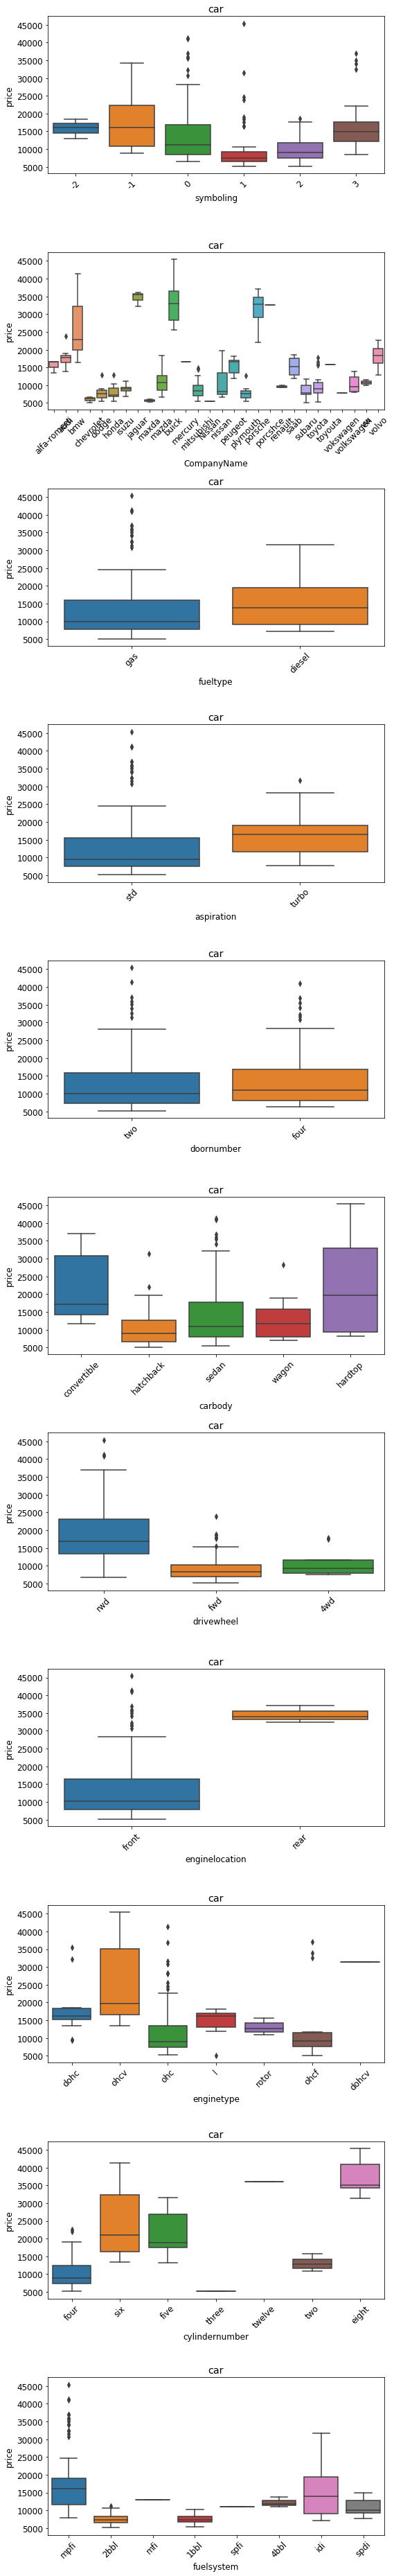

In [780]:
#Visualising categorical columnn with respect to price to detect the outliers
plt.figure(figsize =(15,70))
features = ['symboling','CompanyName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
n = 1
for i in enumerate(features):
    ax = plt.subplot(15,2,n).set_title('car'.format(n))
    sns.boxplot(x = i[1] ,y = 'price' ,data = car)
    plt.xticks(rotation = 45)
    plt.tight_layout()
    n = n+2

# From the above bivariate Analysis point of view, Our following observation:
- symboling :- vehicle with '-1' seems to have high priced whereas vehicle with '1' seems to have dip in prices
- fueltype :-  vehicle  with diesel have higher price than vehicle with gas
- aspiration:- vehicle with turbo have higher price than vehicle with std
- doornumber :- Number of vehicle having doornumber with four are slightly having more price than vehicle having doornumber two
- carbody :-   sedan and hardtop carbody vehicle have higher price
- drivewheel:- vehicle with rwd bieng the most favoured of having higher price
- enginelocation:- vehicle with front  enginelocation are having higher price

# While plotting CompanyName,enginetype,cylindernumber and fueltype has not provided much needful information while  plotting  over boxplot so moved forward with histogram for plotting with

<Figure size 1800x432 with 0 Axes>

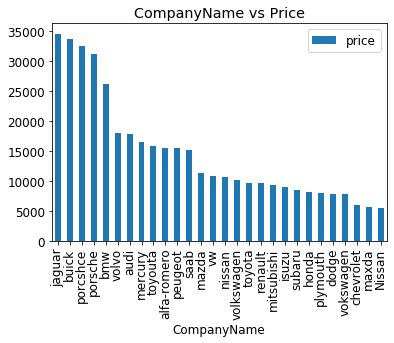

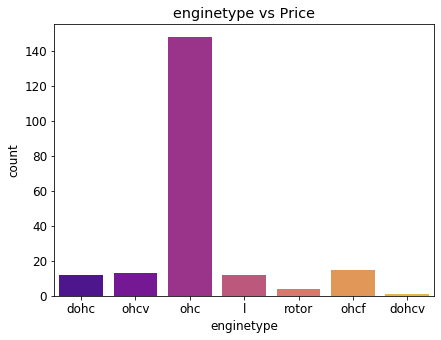

<Figure size 1800x432 with 0 Axes>

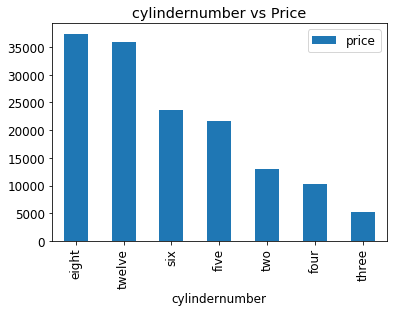

<Figure size 1800x432 with 0 Axes>

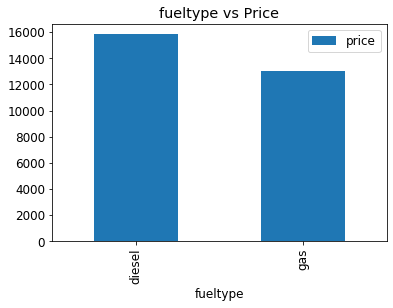

In [781]:
plt.figure(figsize=(25,6))
df = pd.DataFrame(car.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('CompanyName vs Price')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('enginetype vs Price')
sns.countplot(car.enginetype,palette=("plasma"))
plt.show()

plt.figure(figsize=(25,6))
df = pd.DataFrame(car.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('cylindernumber vs Price')
plt.show()

plt.figure(figsize=(25,6))
df = pd.DataFrame(car.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('fueltype vs Price')
plt.show()

# From bivariate analysis point of view,observation as follows:-
- Jaguar and buick company name have higher price
- vehicle with ohc have higher price
- cylindernumber with twelve and eight in vehicles have higher price
- vehicle with diesel have higher price than gas

In [782]:
# Checking the outliers at each percentage
for i in ['symboling','CompanyName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']:
    print(car[i].describe(percentiles = [0.05,.10,.25,.50,.75,.90,.95,.99]))

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
5%        -1.000000
10%       -1.000000
25%        0.000000
50%        1.000000
75%        2.000000
90%        3.000000
95%        3.000000
99%        3.000000
max        3.000000
Name: symboling, dtype: float64
count        205
unique        28
top       toyota
freq          31
Name: CompanyName, dtype: object
count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object
count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object
count      205
unique       2
top       four
freq       115
Name: doornumber, dtype: object
count       205
unique        5
top       sedan
freq         96
Name: carbody, dtype: object
count     205
unique      3
top       fwd
freq      120
Name: drivewheel, dtype: object
count       205
unique        2
top       front
freq        202
Name: enginelocation, dtype: object
count     205
unique      7
top       ohc
freq      148
Name

In [783]:
car.enginetype.describe()

count     205
unique      7
top       ohc
freq      148
Name: enginetype, dtype: object

In [784]:
# Correlation 
car.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


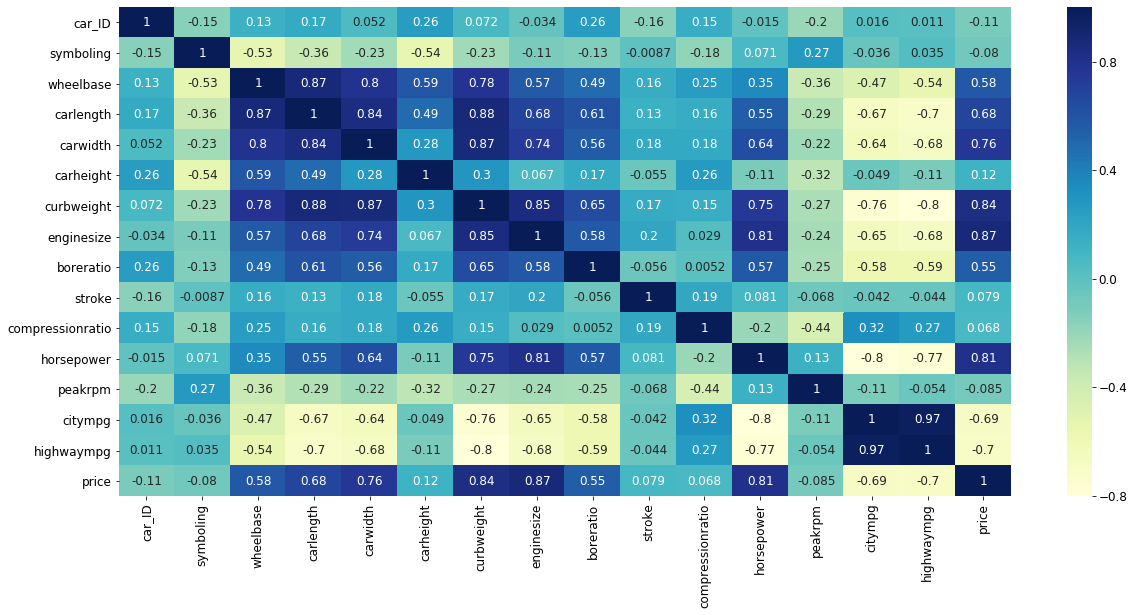

In [785]:
#heatmap
plt.figure(figsize = (20,9))
sns.heatmap(car.corr(),annot = True,cmap = "YlGnBu")
plt.show()

# Let's drop variables highly correlated variables with respect to price:-

a) Positive correlation{curbweight,carwidth,wheelbase}

b) Negative correlation{highwaympg}


# List of significant variables
- peakrpm
- doornumber
- citympg
- fueltype
- carbody
- aspiration
- cylindernumber
- enginesize
- carlength
- CompanyName
- boreratio
- horsepower
- drivewheel
- symboling

In [786]:
car_1 = car[['price','peakrpm','doornumber','citympg','fueltype','carbody','aspiration','cylindernumber','carlength','boreratio','horsepower','drivewheel','enginesize','CompanyName','carheight','symboling']]
car_1.head()

,price,peakrpm,doornumber,citympg,fueltype,carbody,aspiration,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling
0,13495.0,5000,two,21,gas,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3
1,16500.0,5000,two,21,gas,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3
2,16500.0,5000,two,19,gas,hatchback,std,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1
3,13950.0,5500,four,24,gas,sedan,std,four,176.6,3.19,102,fwd,109,audi,54.3,2
4,17450.0,5500,four,18,gas,sedan,std,five,176.6,3.19,115,4wd,136,audi,54.3,2


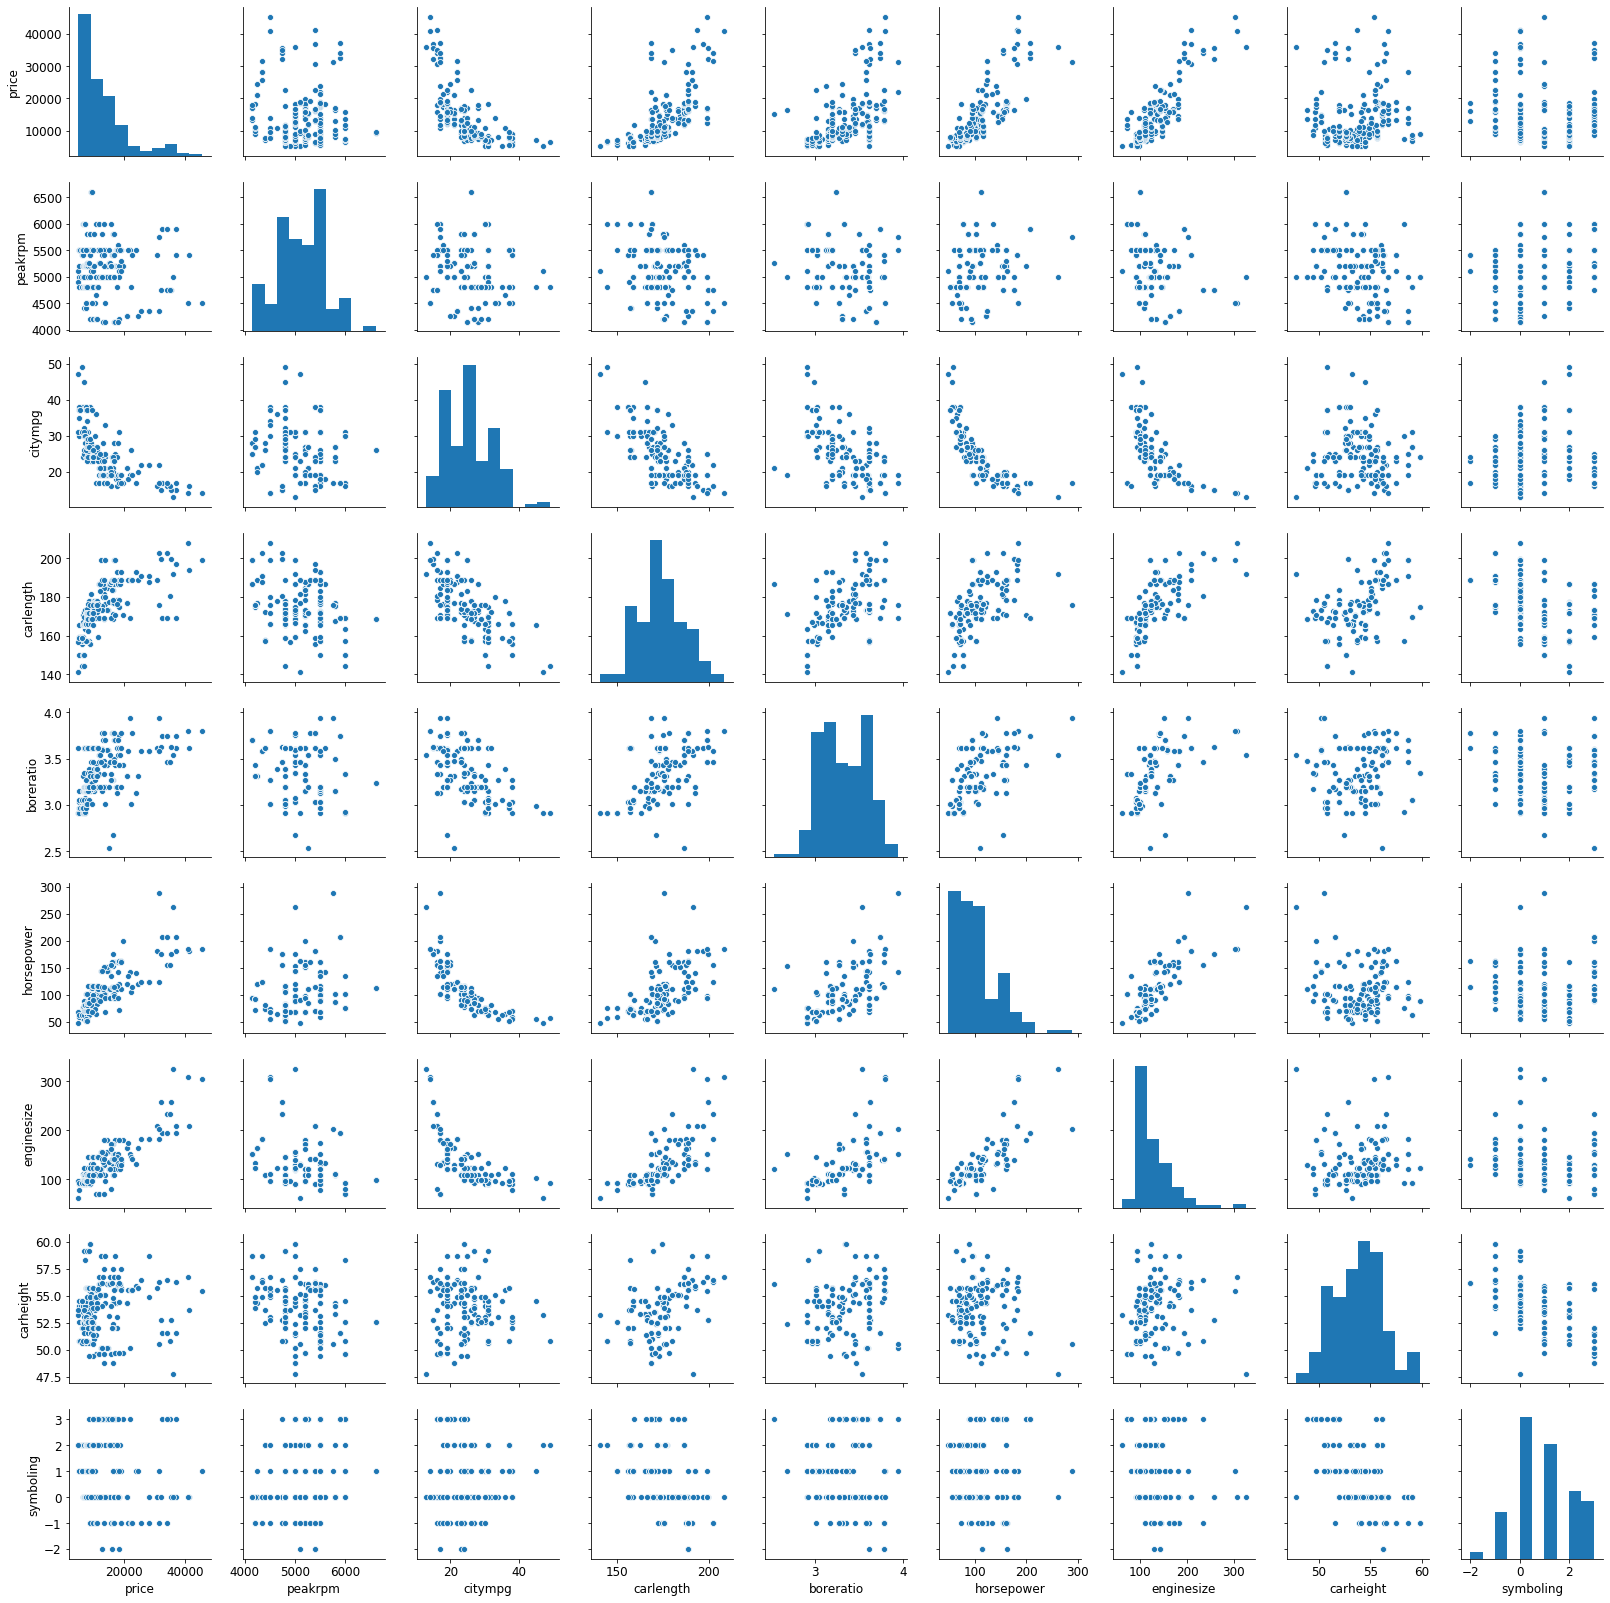

In [787]:
# Plotting graph after visual analysis
sns.pairplot(car_1)
plt.show()

In [788]:
# Preparing for data modelling
car_1.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

# Dummy Variables

In [789]:
# creating dummy variables for the column containing fueltype,carbody,aspiration,cylindernumber,drivewheel,doornumber,CompanyName
status = pd.get_dummies(car_1['fueltype'])
status.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [790]:
# Concating it with the car_1 column
car_1 = pd.concat([car_1,status],axis = 1)
car_1.head()

,price,peakrpm,doornumber,citympg,fueltype,carbody,aspiration,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas
0,13495.0,5000,two,21,gas,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1
1,16500.0,5000,two,21,gas,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1
2,16500.0,5000,two,19,gas,hatchback,std,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1
3,13950.0,5500,four,24,gas,sedan,std,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1
4,17450.0,5500,four,18,gas,sedan,std,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1


In [791]:
# Dropping column containing fuel type
car_1 = car_1.drop('fueltype',axis = 1)
car_1.head()

,price,peakrpm,doornumber,citympg,carbody,aspiration,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas
0,13495.0,5000,two,21,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1
1,16500.0,5000,two,21,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1
2,16500.0,5000,two,19,hatchback,std,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1
3,13950.0,5500,four,24,sedan,std,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1
4,17450.0,5500,four,18,sedan,std,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1


In [792]:
status_1 = pd.get_dummies(car_1['carbody'])
status_1.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [793]:
# Dropping first dummy column
status_1 = pd.get_dummies(car_1['carbody'],drop_first = True)
status_1.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [794]:
car_1 = pd.concat([car_1,status_1],axis = 1)
car_1.head()

,price,peakrpm,doornumber,citympg,carbody,aspiration,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon
0,13495.0,5000,two,21,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0
1,16500.0,5000,two,21,convertible,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0
2,16500.0,5000,two,19,hatchback,std,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0
3,13950.0,5500,four,24,sedan,std,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0
4,17450.0,5500,four,18,sedan,std,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0


In [795]:
car_1 = car_1.drop('carbody',axis = 1)
car_1.head()

,price,peakrpm,doornumber,citympg,aspiration,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon
0,13495.0,5000,two,21,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0
1,16500.0,5000,two,21,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0
2,16500.0,5000,two,19,std,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0
3,13950.0,5500,four,24,std,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0
4,17450.0,5500,four,18,std,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0


In [796]:
status_2 = pd.get_dummies(car_1['aspiration'])
status_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [797]:
car_1 = pd.concat([car_1,status_2],1)
car_1.head()

,price,peakrpm,doornumber,citympg,aspiration,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo
0,13495.0,5000,two,21,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0
1,16500.0,5000,two,21,std,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0
2,16500.0,5000,two,19,std,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0
3,13950.0,5500,four,24,std,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0,1,0
4,17450.0,5500,four,18,std,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0,1,0


In [798]:
car_1 = car_1.drop('aspiration',1)
car_1.head()

,price,peakrpm,doornumber,citympg,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo
0,13495.0,5000,two,21,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0
1,16500.0,5000,two,21,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0
2,16500.0,5000,two,19,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0
3,13950.0,5500,four,24,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0,1,0
4,17450.0,5500,four,18,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0,1,0


In [799]:
status_3 = pd.get_dummies(car_1['cylindernumber'])
status_3.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [800]:
status_3 = pd.get_dummies(car_1['cylindernumber'],drop_first = True)
status_3.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [801]:
car_1 = pd.concat([car_1,status_3],1)
car_1.head()

,price,peakrpm,doornumber,citympg,cylindernumber,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two
0,13495.0,5000,two,21,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,16500.0,5000,two,21,four,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,16500.0,5000,two,19,six,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,13950.0,5500,four,24,four,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,17450.0,5500,four,18,five,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0


In [802]:
car_1 = car_1.drop('cylindernumber',1)
car_1.head()

,price,peakrpm,doornumber,citympg,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two
0,13495.0,5000,two,21,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,16500.0,5000,two,21,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,16500.0,5000,two,19,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,13950.0,5500,four,24,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,17450.0,5500,four,18,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0


In [803]:
status_4 = pd.get_dummies(car_1['drivewheel'])
status_4.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [804]:
status_4 = pd.get_dummies(car_1['drivewheel'],drop_first = True)
status_4.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [805]:
car_1 = pd.concat([car_1,status_4],1)
car_1.head()

,price,peakrpm,doornumber,citympg,carlength,boreratio,horsepower,drivewheel,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd
0,13495.0,5000,two,21,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,16500.0,5000,two,21,168.8,3.47,111,rwd,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,16500.0,5000,two,19,171.2,2.68,154,rwd,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,13950.0,5500,four,24,176.6,3.19,102,fwd,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
4,17450.0,5500,four,18,176.6,3.19,115,4wd,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [806]:
car_1 = car_1.drop('drivewheel',1)
car_1.head()

,price,peakrpm,doornumber,citympg,carlength,boreratio,horsepower,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd
0,13495.0,5000,two,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,16500.0,5000,two,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,16500.0,5000,two,19,171.2,2.68,154,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,13950.0,5500,four,24,176.6,3.19,102,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
4,17450.0,5500,four,18,176.6,3.19,115,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [807]:
status_5 = pd.get_dummies(car_1['doornumber'])
status_5.head()

,four,two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [808]:
car_1 = pd.concat([car_1,status_5],1)
car_1.head()

,price,peakrpm,doornumber,citympg,carlength,boreratio,horsepower,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two
0,13495.0,5000,two,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,16500.0,5000,two,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,16500.0,5000,two,19,171.2,2.68,154,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,13950.0,5500,four,24,176.6,3.19,102,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
4,17450.0,5500,four,18,176.6,3.19,115,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


In [809]:
car_1 = car_1.drop('doornumber',1)
car_1.head()

,price,peakrpm,citympg,carlength,boreratio,horsepower,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two
0,13495.0,5000,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,16500.0,5000,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,16500.0,5000,19,171.2,2.68,154,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,13950.0,5500,24,176.6,3.19,102,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
4,17450.0,5500,18,176.6,3.19,115,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


In [810]:
status_6 = pd.get_dummies(car_1['CompanyName'])
status_6.head()

,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [811]:
car_1 = pd.concat([car_1,status_6],1)
car_1.head()

,price,peakrpm,citympg,carlength,boreratio,horsepower,enginesize,CompanyName,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,13495.0,5000,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,5000,21,168.8,3.47,111,130,alfa-romero,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16500.0,5000,19,171.2,2.68,154,152,alfa-romero,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13950.0,5500,24,176.6,3.19,102,109,audi,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17450.0,5500,18,176.6,3.19,115,136,audi,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [812]:
car_1 = car_1.drop('CompanyName',1)
car_1.head()

,price,peakrpm,citympg,carlength,boreratio,horsepower,enginesize,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,13495.0,5000,21,168.8,3.47,111,130,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,5000,21,168.8,3.47,111,130,48.8,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16500.0,5000,19,171.2,2.68,154,152,52.4,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13950.0,5500,24,176.6,3.19,102,109,54.3,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17450.0,5500,18,176.6,3.19,115,136,54.3,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Above data set having categories column has been changed to 0 and 1 with leaving all the values having numerical column

In [813]:
car_1.shape

(205, 55)

In [814]:
car_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 55 columns):
price          205 non-null float64
peakrpm        205 non-null int64
citympg        205 non-null int64
carlength      205 non-null float64
boreratio      205 non-null float64
horsepower     205 non-null int64
enginesize     205 non-null int64
carheight      205 non-null float64
symboling      205 non-null int64
diesel         205 non-null uint8
gas            205 non-null uint8
hardtop        205 non-null uint8
hatchback      205 non-null uint8
sedan          205 non-null uint8
wagon          205 non-null uint8
std            205 non-null uint8
turbo          205 non-null uint8
five           205 non-null uint8
four           205 non-null uint8
six            205 non-null uint8
three          205 non-null uint8
twelve         205 non-null uint8
two            205 non-null uint8
fwd            205 non-null uint8
rwd            205 non-null uint8
four           205 non-null uint8
two

# Splitting into train and test data

In [815]:
df_train,df_test = train_test_split(car_1,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(143, 55)
(62, 55)


In [816]:
# Rescaling the features
# Normalisation to features between 0 and 1 
# Instantiate the object
scaler = MinMaxScaler()

# Create a list of numeric variable
num_vars = ['citympg','carlength','boreratio','horsepower','price','enginesize','peakrpm','carheight','symboling']

## Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,peakrpm,citympg,carlength,boreratio,horsepower,enginesize,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
122,0.068818,0.551020,0.500000,0.426016,0.230159,0.083333,0.139623,0.265487,0.6,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125,0.466890,0.551020,0.166667,0.452033,1.000000,0.395833,0.339623,0.212389,1.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
166,0.122110,1.000000,0.361111,0.448780,0.444444,0.266667,0.139623,0.424779,0.6,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.314446,0.346939,0.222222,0.450407,0.626984,0.262500,0.260377,0.088496,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.382131,0.387755,0.111111,0.775610,0.746032,0.475000,0.260377,0.858407,0.2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Above table are now having all the numerical values ranging from 0 and 1 

# Training the model

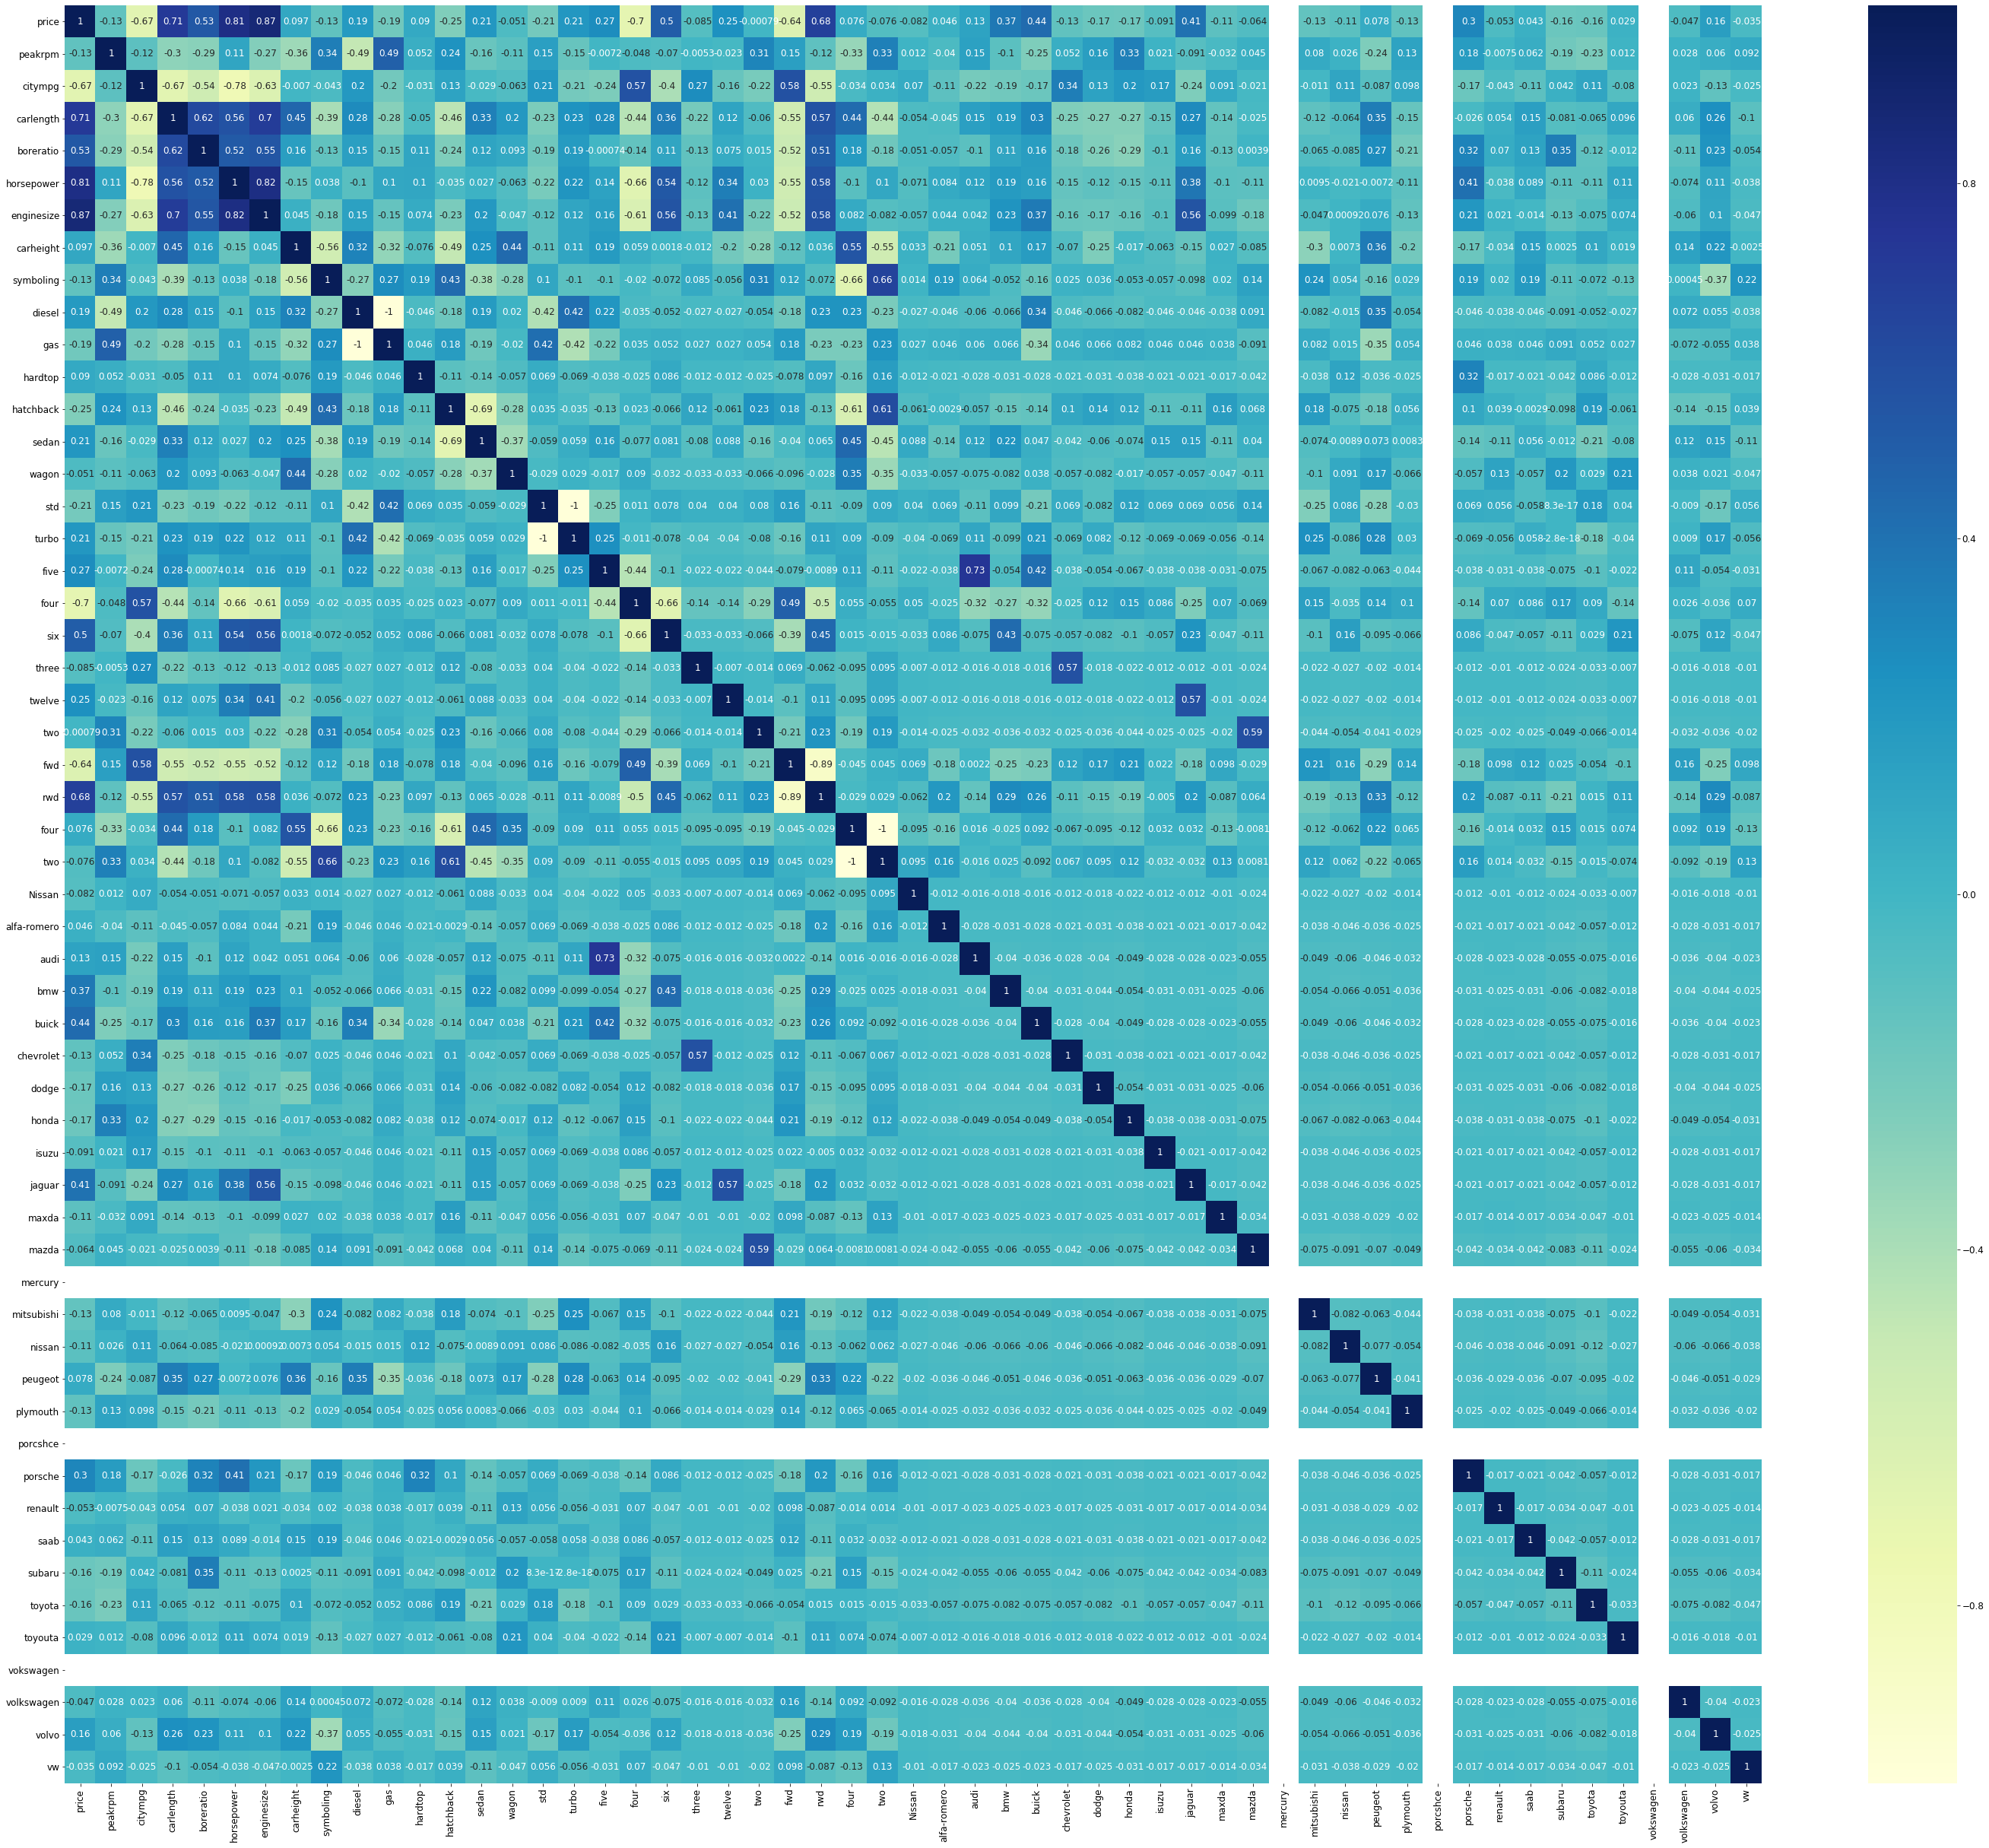

In [817]:
# heatmap
plt.figure(figsize = (50,43))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

# Dividing into X and y for the model building

In [818]:
# defining X and y with the help of below table
## 'X' is in capital letter and 'y' is in small leter which are symbols used in machine learning where X would be a dataframe not a single column(Multiple Variable) and y would be a single column(Single Variable)
y_train = df_train.pop('price')
X_train = df_train

In [819]:
X_train.head()

,peakrpm,citympg,carlength,boreratio,horsepower,enginesize,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
122,0.551020,0.500000,0.426016,0.230159,0.083333,0.139623,0.265487,0.6,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125,0.551020,0.166667,0.452033,1.000000,0.395833,0.339623,0.212389,1.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
166,1.000000,0.361111,0.448780,0.444444,0.266667,0.139623,0.424779,0.6,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.346939,0.222222,0.450407,0.626984,0.262500,0.260377,0.088496,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.387755,0.111111,0.775610,0.746032,0.475000,0.260377,0.858407,0.2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [820]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

# Building our model

This time ,we will be using the linear regression function from Scikit Learn for its compatibility with RFE where RFE{Recursive Feature Elimination}

In [821]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [822]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train,y_train)

In [823]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('peakrpm', False, 7),
 ('citympg', False, 19),
 ('carlength', True, 1),
 ('boreratio', True, 1),
 ('horsepower', False, 28),
 ('enginesize', True, 1),
 ('carheight', False, 13),
 ('symboling', False, 32),
 ('diesel', False, 40),
 ('gas', False, 38),
 ('hardtop', False, 18),
 ('hatchback', False, 15),
 ('sedan', False, 16),
 ('wagon', False, 17),
 ('std', False, 21),
 ('turbo', False, 9),
 ('five', False, 3),
 ('four', False, 4),
 ('six', False, 29),
 ('three', True, 1),
 ('twelve', False, 2),
 ('two', True, 1),
 ('fwd', False, 36),
 ('rwd', False, 37),
 ('four', False, 39),
 ('two', False, 35),
 ('Nissan', False, 20),
 ('alfa-romero', False, 25),
 ('audi', False, 30),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 23),
 ('dodge', False, 12),
 ('honda', False, 11),
 ('isuzu', False, 33),
 ('jaguar', False, 42),
 ('maxda', False, 27),
 ('mazda', False, 41),
 ('mercury', False, 43),
 ('mitsubishi', False, 8),
 ('nissan', False, 24),
 ('peugeot', False, 14),
 ('plymouth', 

In [824]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'boreratio', 'enginesize', 'three', 'two', 'bmw', 'buick',
       'porsche', 'saab', 'volvo'],
      dtype='object')

In [825]:
X_train.columns[~rfe.support_]

Index(['peakrpm', 'citympg', 'horsepower', 'carheight', 'symboling', 'diesel',
       'gas', 'hardtop', 'hatchback', 'sedan', 'wagon', 'std', 'turbo', 'five',
       'four', 'six', 'twelve', 'fwd', 'rwd', 'four', 'two', 'Nissan',
       'alfa-romero', 'audi', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porcshce', 'renault', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw'],
      dtype='object')

# Building model using statsmodel for the detailed statistics

In [826]:
# Creating X_test dataframe with RFE selected 
X_train_rfe = X_train[col]

In [827]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [828]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [829]:
# let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.65e-61
Time:                        16:54:44   Log-Likelihood:                 184.53
No. Observations:                 143   AIC:                            -345.1
Df Residuals:                     131   BIC:                            -309.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1113      0.024     -4.554      0.0

# variable "two" has to be dropped off  because of its insignificance level value  is 0.638 which is higher than 0.05(standard)

# Model-1

In [830]:
X_train_new = X_train_rfe.drop(["two"],1)

In [831]:
# Rebuilding the model without two
# Adding the constant variable
X_train_lm = sm.add_constant(X_train_new)

In [832]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [833]:
# Let's see the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.35e-55
Time:                        16:54:45   Log-Likelihood:                 165.58
No. Observations:                 143   AIC:                            -311.2
Df Residuals:                     133   BIC:                            -281.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1012      0.022     -4.691      0.0

# Model-2

In [834]:
X_train_new_1 = X_train_new.drop(["saab"],1)

In [835]:
# Rebuilding the model without saab
# Adding the constant variable
X_train_lm = sm.add_constant(X_train_new_1)

In [836]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [837]:
# Let's see the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     115.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.82e-56
Time:                        16:54:46   Log-Likelihood:                 164.66
No. Observations:                 143   AIC:                            -311.3
Df Residuals:                     134   BIC:                            -284.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1060      0.021     -4.971      0.0

# Model-3

In [838]:
X_train_new_2 = X_train_new_1.drop(["three"],1)

In [839]:
# Rebuilding the model without three
# Adding the constant variable
X_train_lm = sm.add_constant(X_train_new_2)

In [840]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [841]:
# Let's see the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.09e-57
Time:                        16:54:46   Log-Likelihood:                 163.49
No. Observations:                 143   AIC:                            -311.0
Df Residuals:                     135   BIC:                            -287.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0988      0.021     -4.736      0.0

# Model-4

In [842]:
X_train_new_3 = X_train_new_2.drop(["boreratio"],1)

In [843]:
# Rebuilding the model without boreratio
# Adding the constant variable
X_train_lm = sm.add_constant(X_train_new_3)

In [844]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [845]:
# Let's see the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.40e-57
Time:                        16:54:47   Log-Likelihood:                 161.93
No. Observations:                 143   AIC:                            -309.9
Df Residuals:                     136   BIC:                            -289.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1118      0.020     -5.701      0.0

In [846]:
X_train_new_3.columns

Index(['carlength', 'enginesize', 'bmw', 'buick', 'porsche', 'volvo'], dtype='object')

In [847]:
# Calcualte the VIFs for the new model i.e model-4

vif = pd.DataFrame()
X = X_train_new_3
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,enginesize,8.30
0,carlength,7.51
3,buick,1.20
4,porsche,1.15
2,bmw,1.13
5,volvo,1.11


# Residual Analysis

In [848]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

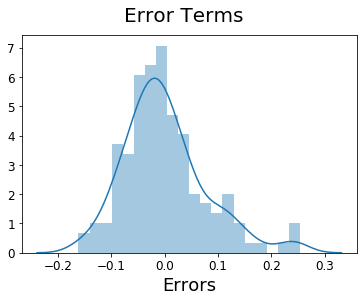

In [849]:
# Plot the histogram of the errors terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)

# Plot heading
fig.suptitle('Error Terms', fontsize = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Making Predictions

###### Applying the scaling on the test sets

In [850]:
num_vars = ['citympg','carlength','boreratio','horsepower','price','enginesize','peakrpm','carheight','symboling']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [851]:
y_test = df_test.pop('price')
X_test =df_test

In [852]:
X_test.head()

,peakrpm,citympg,carlength,boreratio,horsepower,enginesize,carheight,symboling,diesel,gas,hardtop,hatchback,sedan,wagon,std,turbo,five,four,six,three,twelve,two,fwd,rwd,four,two,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
160,0.265306,0.694444,0.409756,0.404762,0.091667,0.139623,0.460177,0.4,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
186,0.448980,0.388889,0.497561,0.404762,0.154167,0.181132,0.699115,0.8,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59,0.265306,0.361111,0.596748,0.563492,0.150000,0.230189,0.522124,0.6,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165,1.000000,0.361111,0.448780,0.444444,0.266667,0.139623,0.424779,0.6,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
140,0.102041,0.361111,0.263415,0.746032,0.104167,0.177358,0.699115,0.8,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [853]:
# Now let's use our model to make predictions

# Creating X_test new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_3.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,carlength,enginesize,bmw,buick,porsche,volvo
160,1.0,0.409756,0.139623,0,0,0,0
186,1.0,0.497561,0.181132,0,0,0,0
59,1.0,0.596748,0.230189,0,0,0,0
165,1.0,0.448780,0.139623,0,0,0,0
140,1.0,0.263415,0.177358,0,0,0,0


In [854]:
# Making Predictions
y_test_1 = lm.predict(X_test_new)

In [855]:
# Evaluate
r2_score(y_true = y_test, y_pred = y_test_1)

0.8544649415441957

Text(0.5, 0, 'y_test')

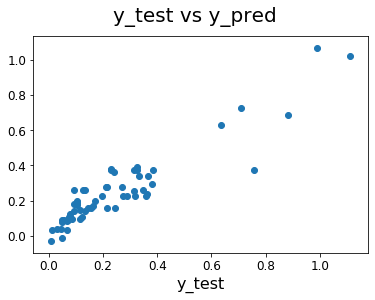

In [856]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_1)
# Plot Labeling
fig.suptitle('y_test vs y_pred',fontsize = 20)
# X- label
plt.xlabel('y_test', fontsize = 18)
# Y- label
plt.xlabel('y_test', fontsize = 16)

# We can see that the equation of our best fitted line:
    
#### price = 0.2294 x carlength + 0.7577 x enginesize +  0.2384 x bmw + 0.2224 x buick + 0.3157 x porsche + 0.0789 x volvo

# Conclusion

 - Overall, model seem to be stable and variables which were affecting the car prices:
    
    a) carlength
    
    b) enginesize
    
    c) Company Name {bmw,buick,porsche,volvo}
    
- R and adjusted R-squared value were almost same which means that the parameters in our model are redundant

- p-value are almost less than 0.05(standard) which means that all predictors are statistically are significant